# **Crop Recommendation (Model Training)**
#### **Objective** : To train a Machine learning model to predict crop labels based on given features or variables.
#### **Problem Type** : Multiclass Classification (predict crop to grow based on given features)
#### The dataset consists of about 2200 samples and 7 Independent features to predict 22 different classes of crops.
#### **Dataset Link** - https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

## **Exploratory Data Analysis**

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the downloaded dataset
path = r"Expanded_Crop_recommendation.csv"
df = pd.read_csv(path)
df.sample(15)

N           P           K  temperature   humidity        ph  \
5307   10.026981   50.653202   15.905959    28.229819  81.606135  6.545221   
1333   99.000000    5.000000   47.000000    24.130788  84.844946  6.649087   
6705   93.965040   62.417770   36.465741    20.760281  84.843693  7.071818   
11     90.000000   46.000000   42.000000    23.978982  81.450616  7.502834   
3955   32.356155  123.665312  196.250069    22.205411  91.121705  5.814762   
3278   73.240542   60.545846   34.491843    22.872004  84.981749  6.564599   
1515   30.000000  143.000000  199.000000    23.768816  90.598103  5.798351   
1021  110.000000   78.000000   50.000000    25.937302  78.898644  5.915569   
5513   83.258421    6.376141   41.131220    25.490721  88.742917  5.955292   
1652   18.000000    5.000000   11.000000    20.879474  90.937562  6.251587   
4282   96.268395   85.219706   49.108667    27.244577  81.415701  6.350065   
3827   20.151028   32.365501   32.813076    31.765398  48.294820  5.328491   
5757  102.863534   45.458050   22.113137    23.375074  75.160255  6.296529   
4811   54.210925   57.276067   47.027198    25.633949  94.626462  6.651198   
3112   18.327142  129.402950  202.520857    23.856708  81.468998  5.947941   

        rainfall       label  
5307   44.535190    mungbean  
1333   51.194702  watermelon  
6705  282.806267        rice  
11    250.083234        rice  
3955  121.627914       apple  
3278  179.240667        jute  
1515  102.264855       apple  
1021   98.217475      banana  
5513   51.824969  watermelon  
1652  102.455079      orange  
4282   92.533781      banana  
3827   92.490209       mango  
5757   65.410592      cotton  
4811  239.382614      papaya  
3112   70.164298      grapes

In [3]:
print("SHAPE : ", df.shape)
df.info()

SHAPE :  (7000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            7000 non-null   float64
 1   P            7000 non-null   float64
 2   K            7000 non-null   float64
 3   temperature  7000 non-null   float64
 4   humidity     7000 non-null   float64
 5   ph           7000 non-null   float64
 6   rainfall     7000 non-null   float64
 7   label        7000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 437.6+ KB


In [4]:
df.describe()

N            P            K  temperature     humidity  \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean     50.545814    53.930239    48.856250    25.603516    71.813193   
std      36.853702    33.513211    51.735192     5.175341    22.000838   
min      -4.726487     0.013823     0.102980     8.825675    12.820161   
25%      20.868484    28.991013    20.484696    22.648263    60.515744   
50%      37.000000    51.525588    32.000000    25.563888    80.452394   
75%      84.004134    68.000000    48.893536    28.580032    89.739873   
max     144.779258   149.538251   209.847772    44.448727   101.594216   

                ph     rainfall  
count  7000.000000  7000.000000  
mean      6.478028   104.173868  
std       0.781824    55.559373  
min       3.340352    15.544246  
25%       5.975455    64.847203  
50%       6.426178    95.018024  
75%       6.934234   126.615686  
max       9.935091   301.232603

In [5]:
# Printing number of samples per each class/crop
df["label"].value_counts()

label
rice           340
grapes         340
papaya         336
coconut        334
maize          334
apple          330
jute           329
blackgram      325
cotton         324
lentil         323
mothbeans      315
pomegranate    314
banana         312
mango          309
muskmelon      307
orange         307
mungbean       307
kidneybeans    306
pigeonpeas     305
coffee         305
chickpea       303
watermelon     295
Name: count, dtype: int64

## **Analyze Numerical Variables**

In [6]:
# list of all numerical variables in dataset
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

# list of all discrete variables in dataset
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]

# list of all continuous variables in dataset
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]

print("Discrete Variables : ",discrete_features)
print("Continuous Variables : ",continuous_features)

Discrete Variables :  []
Continuous Variables :  ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


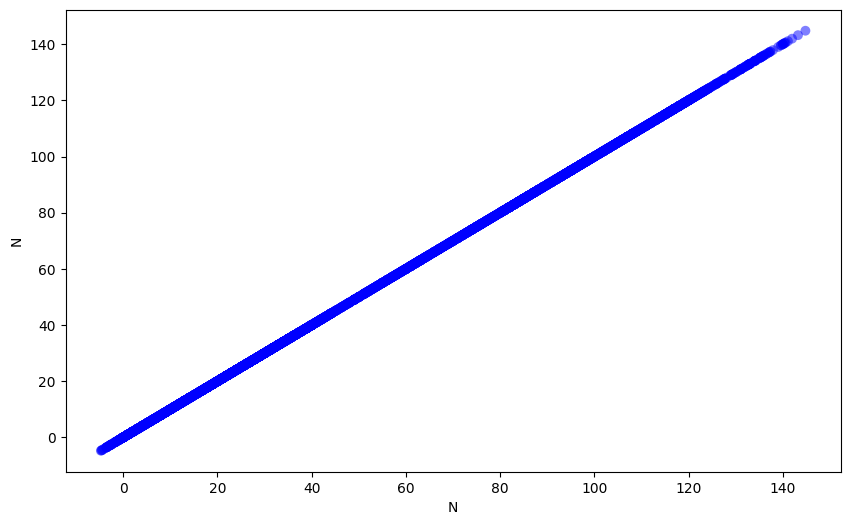

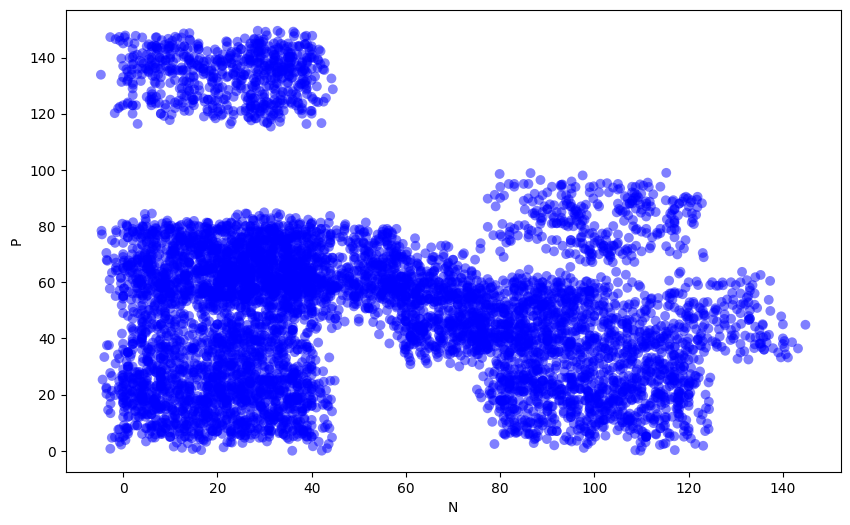

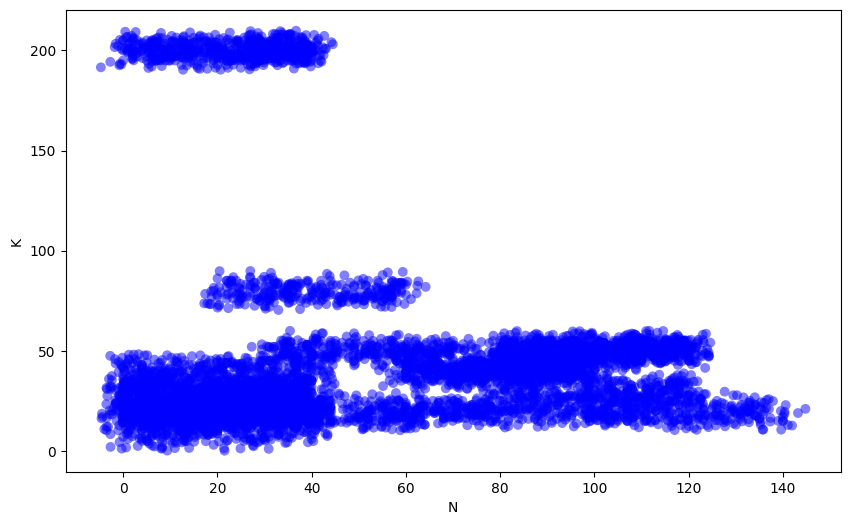

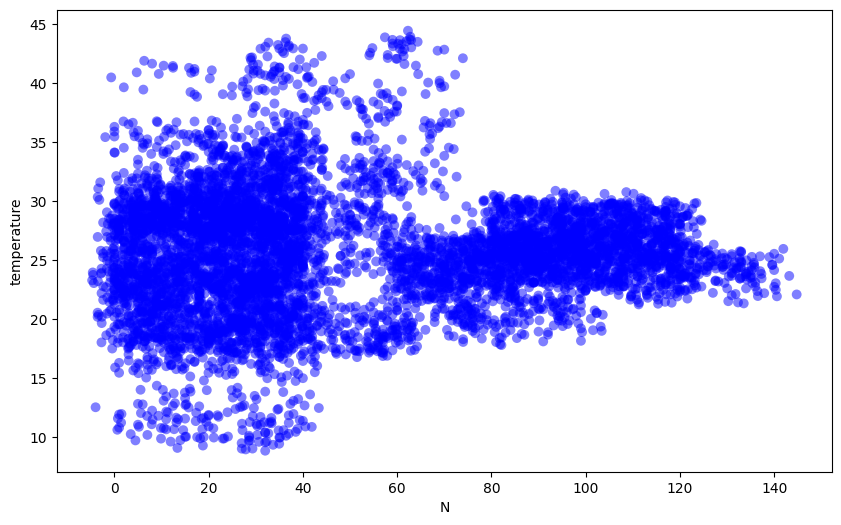

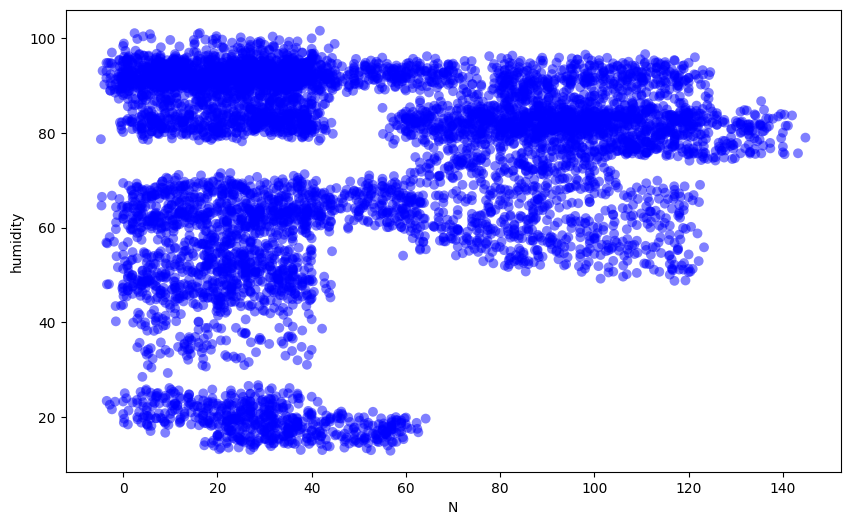

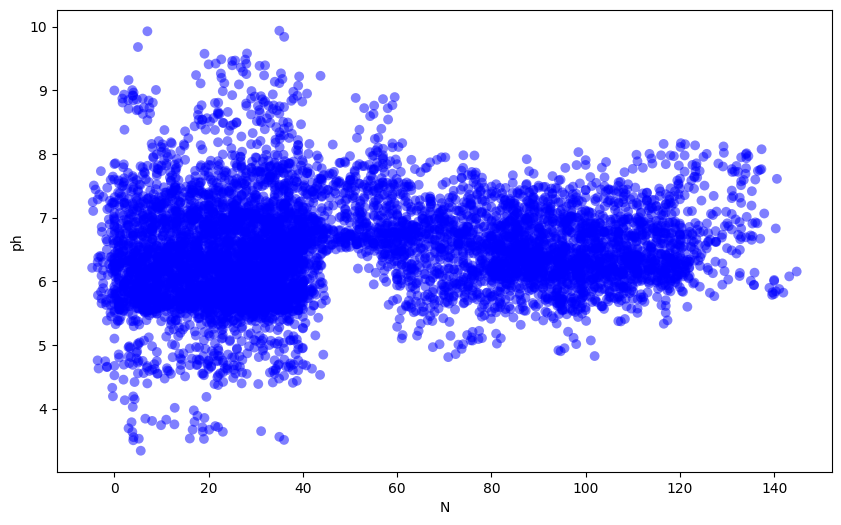

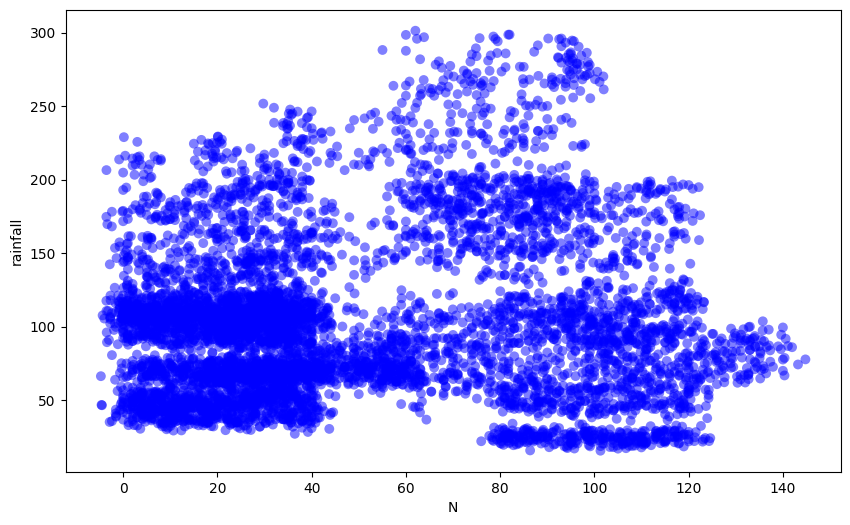

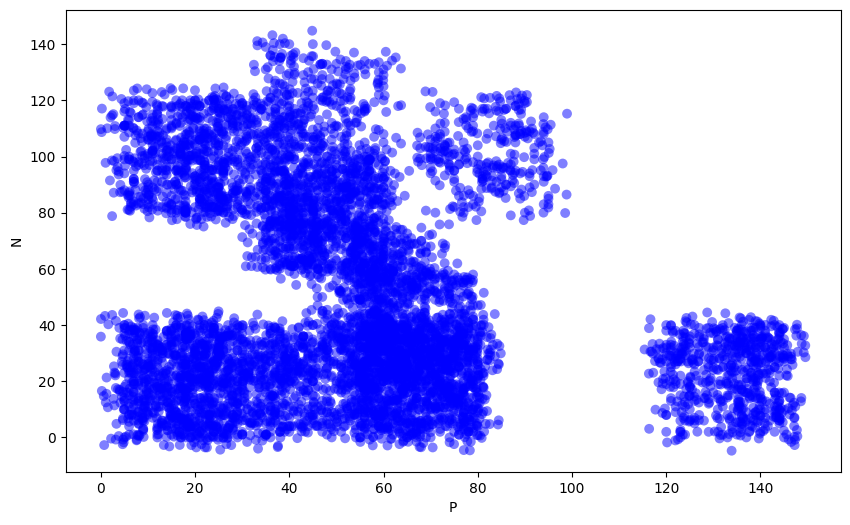

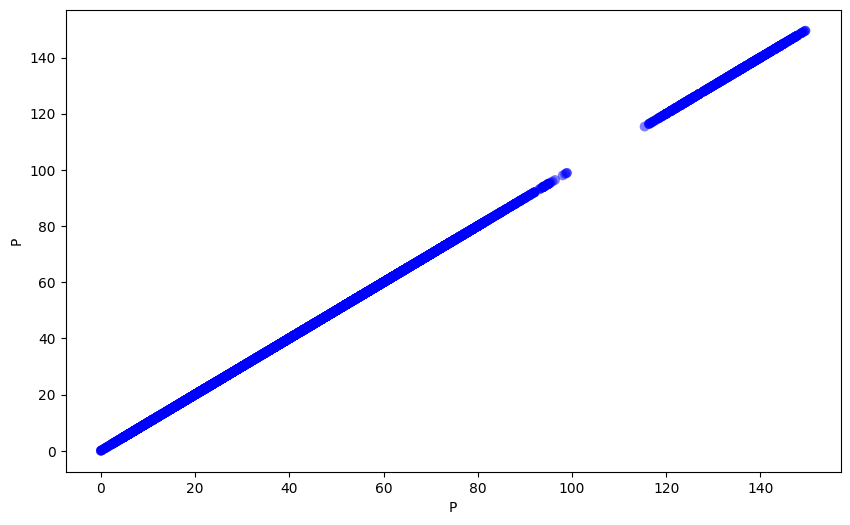

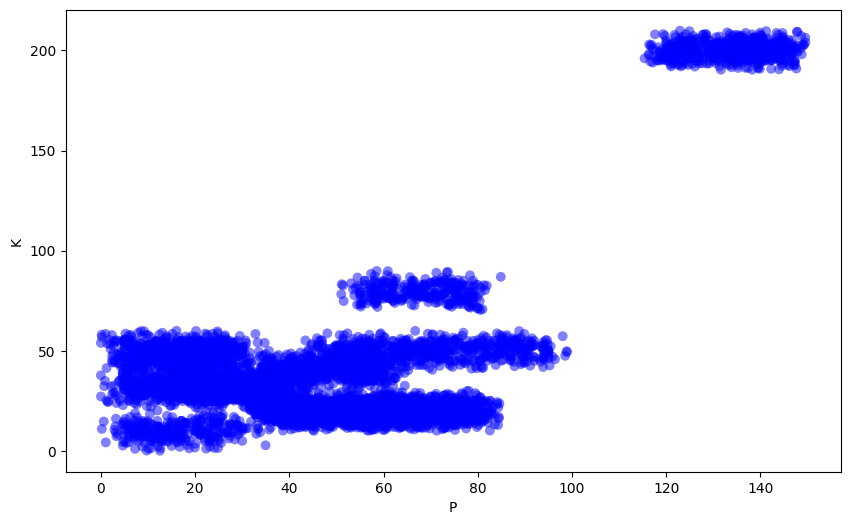

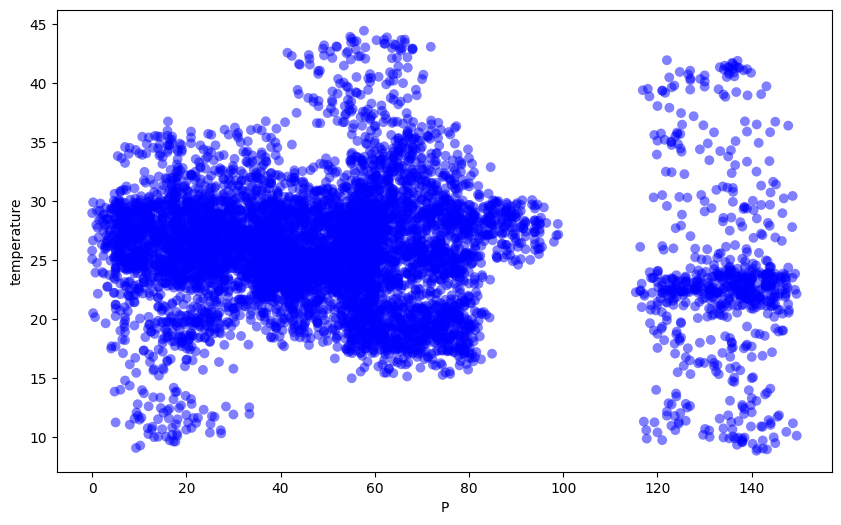

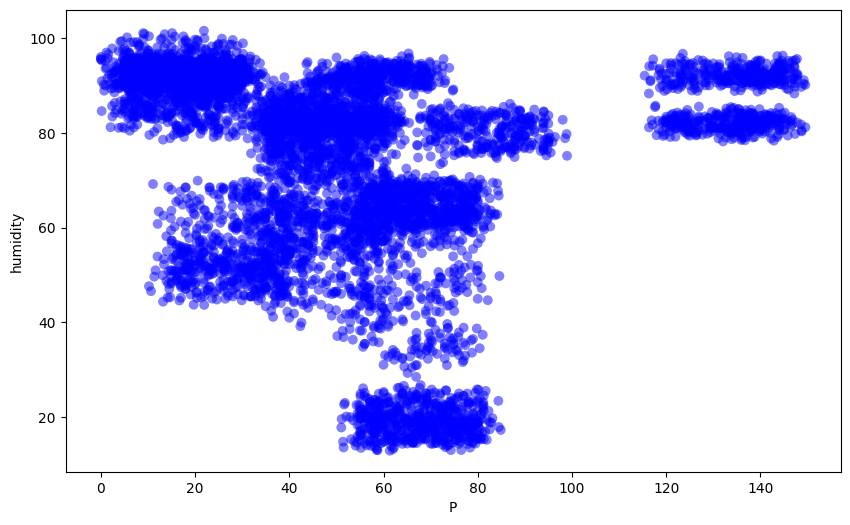

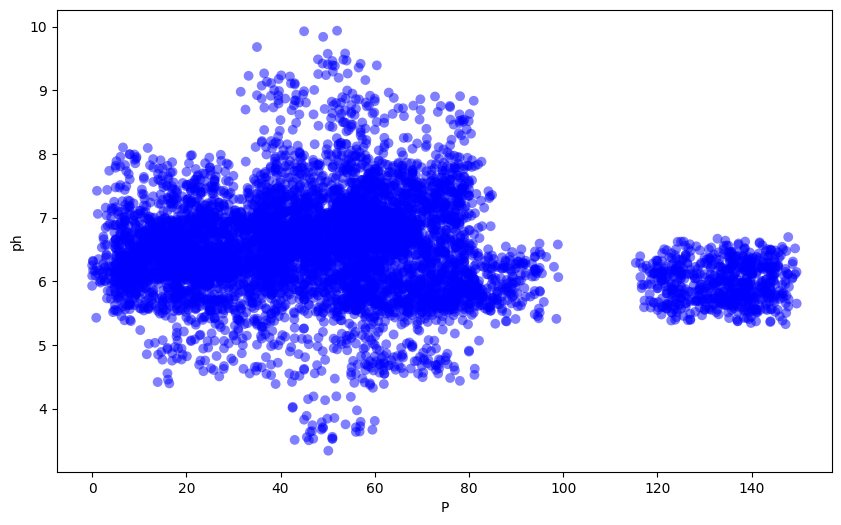

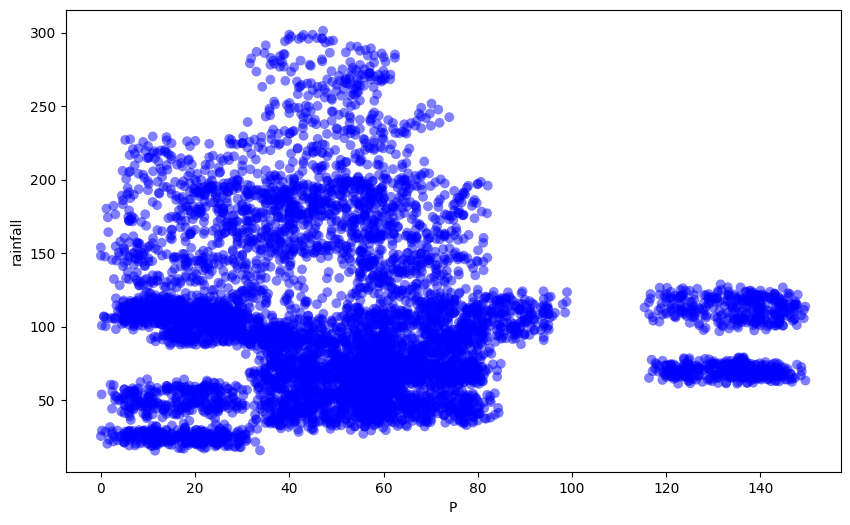

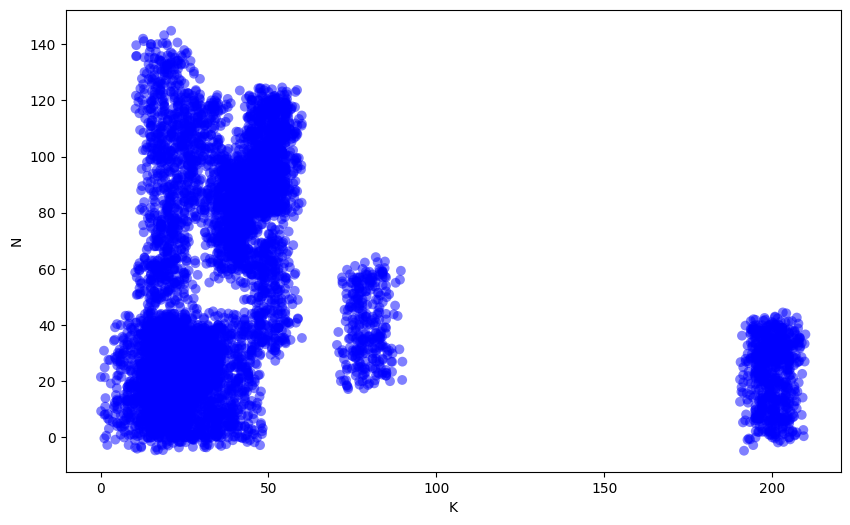

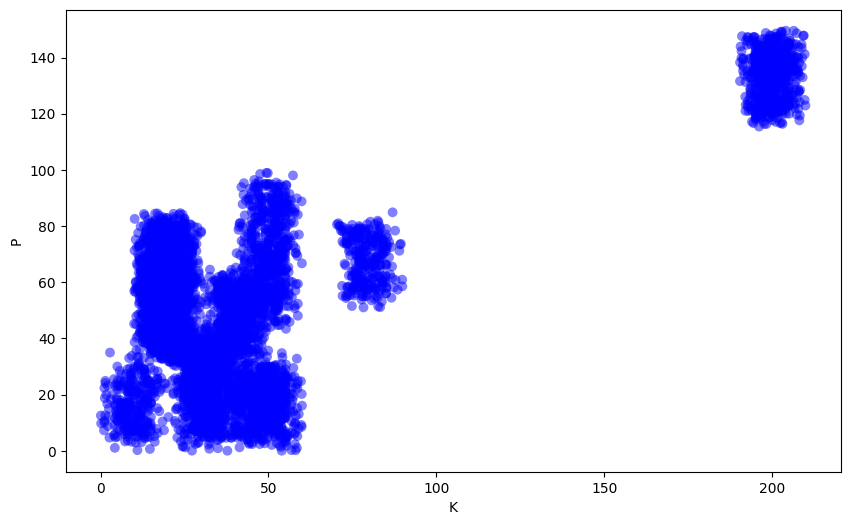

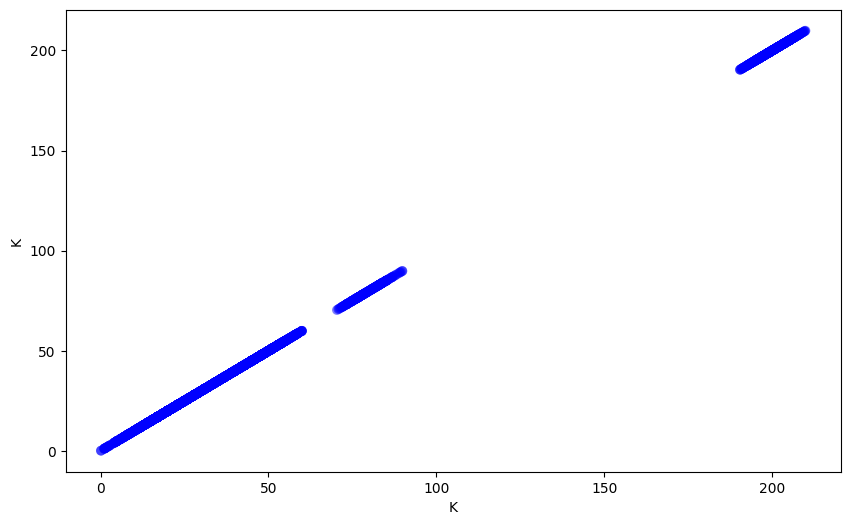

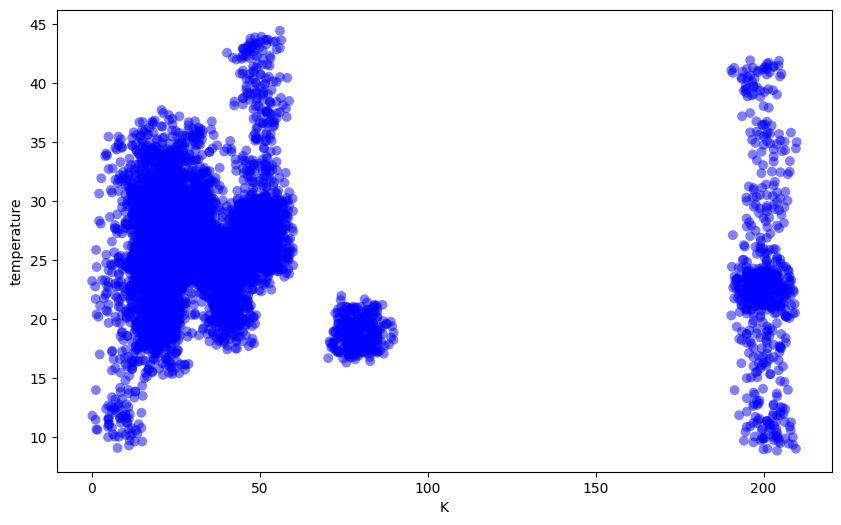

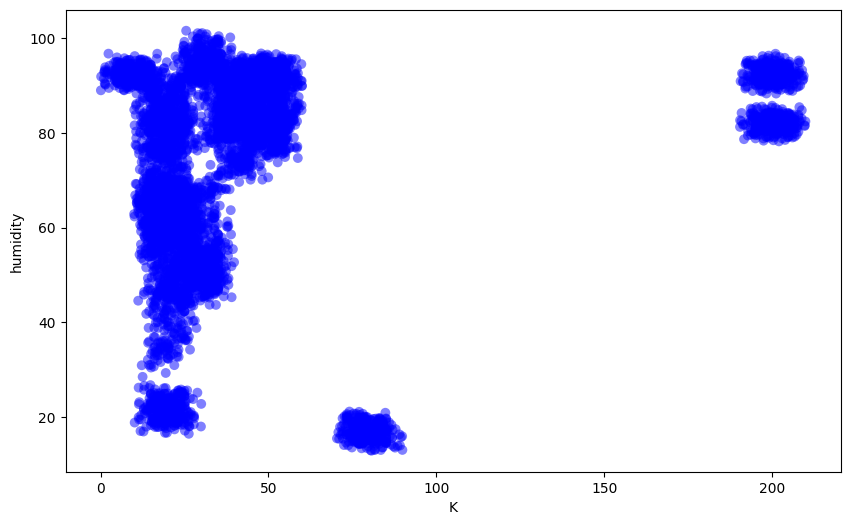

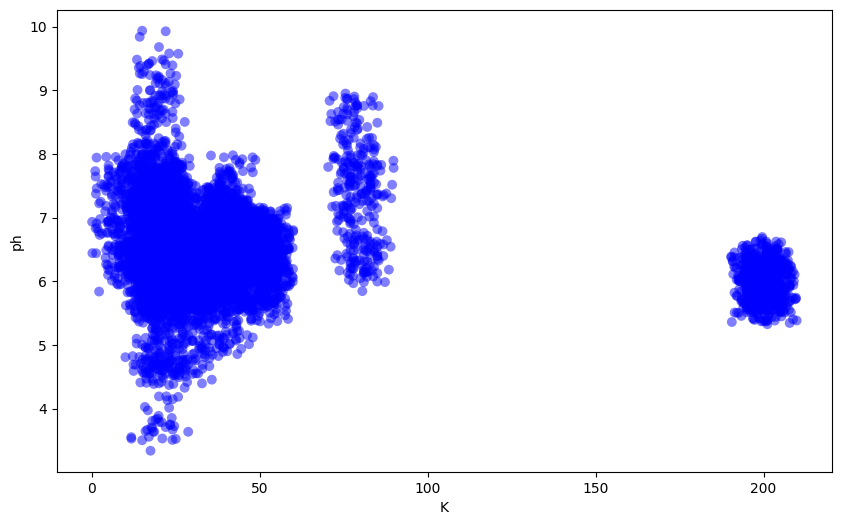

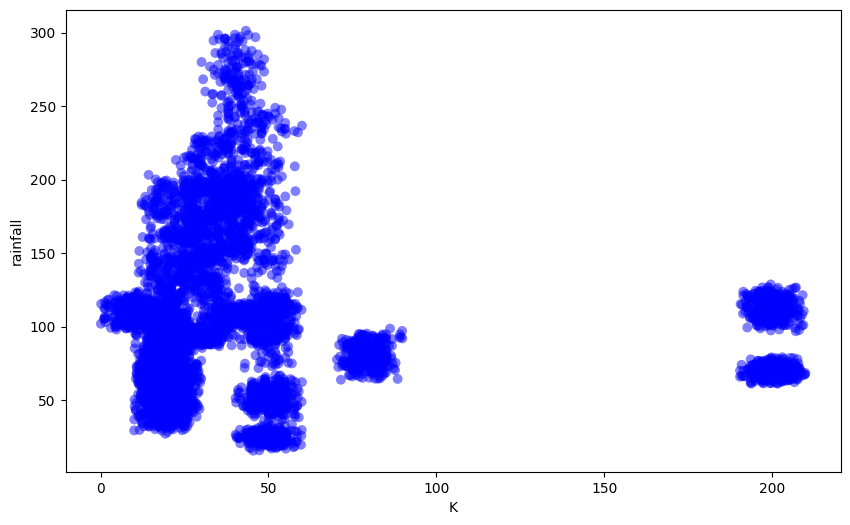

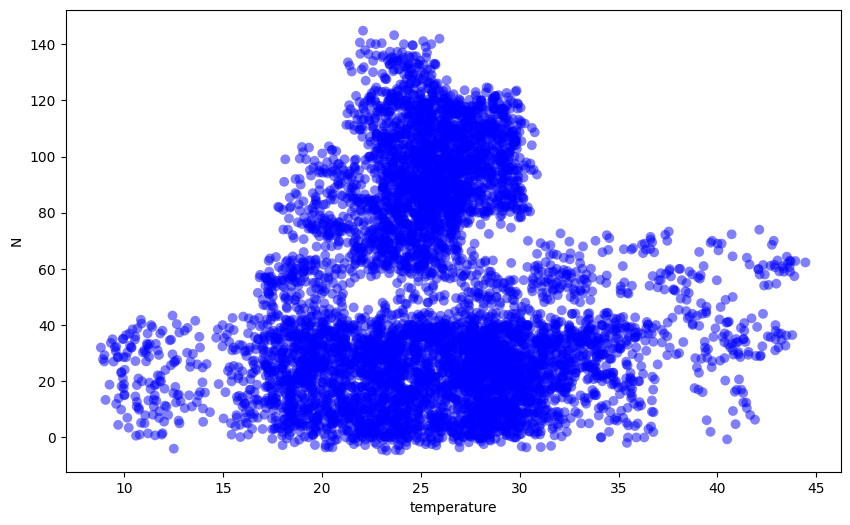

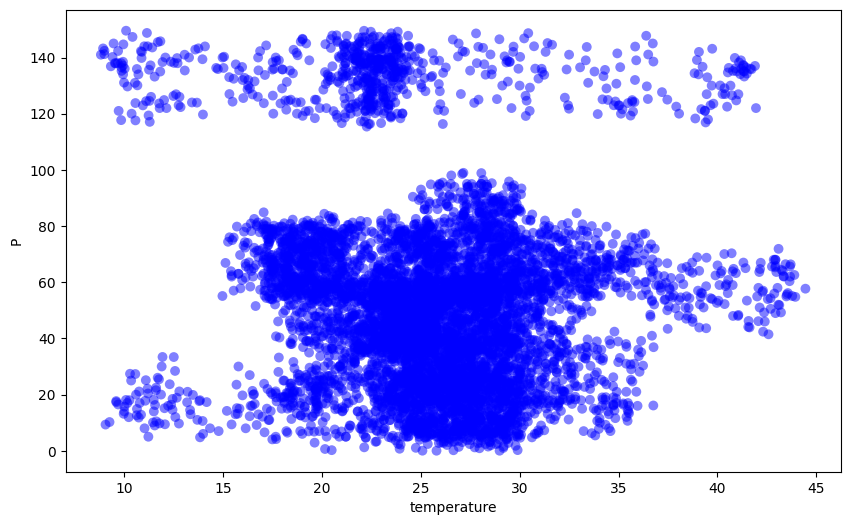

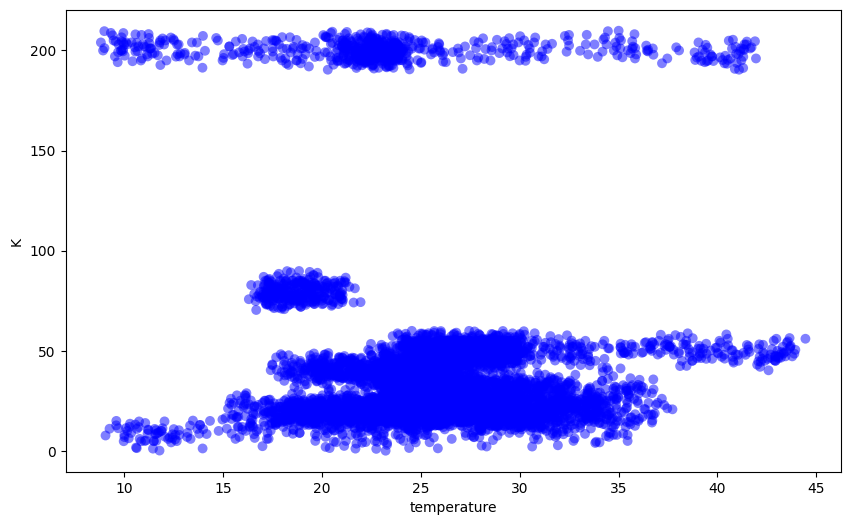

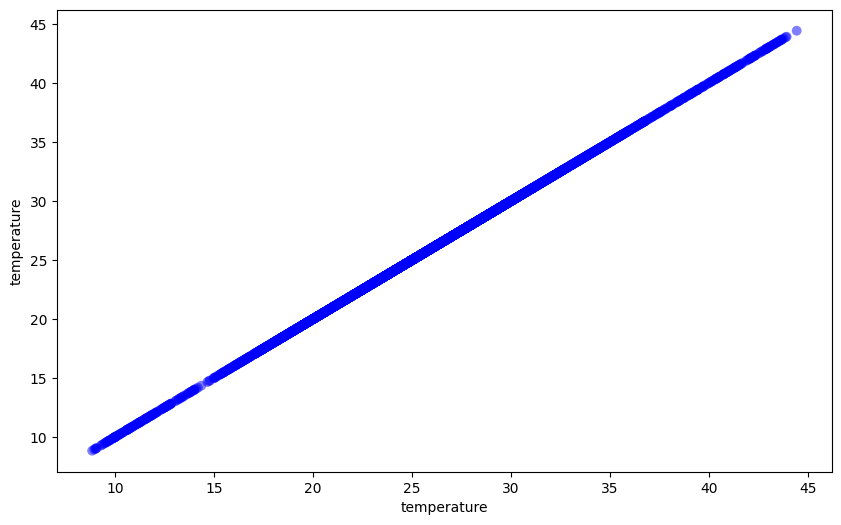

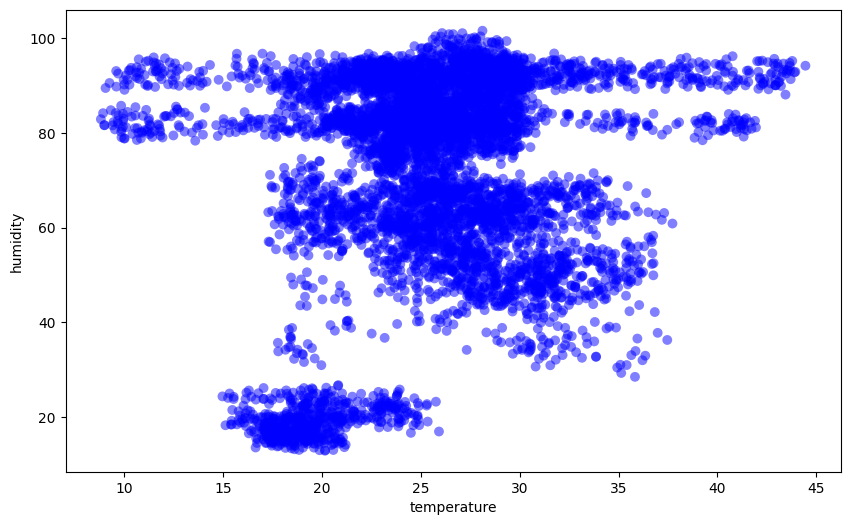

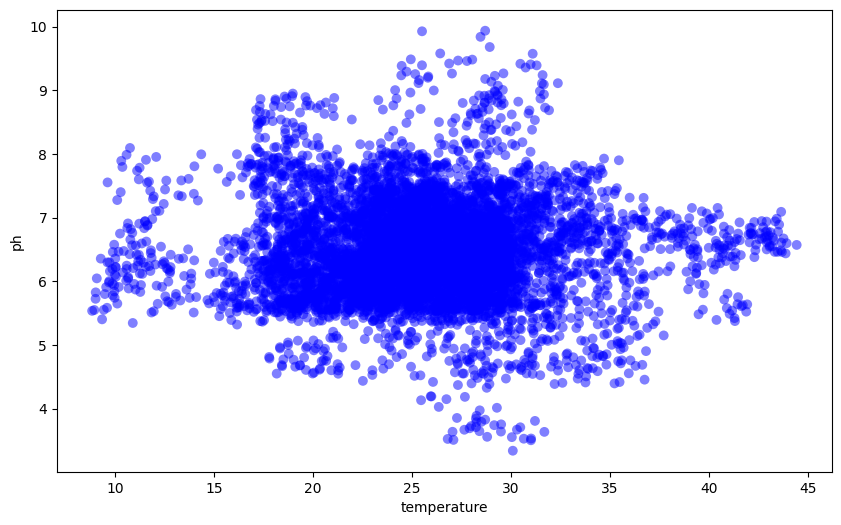

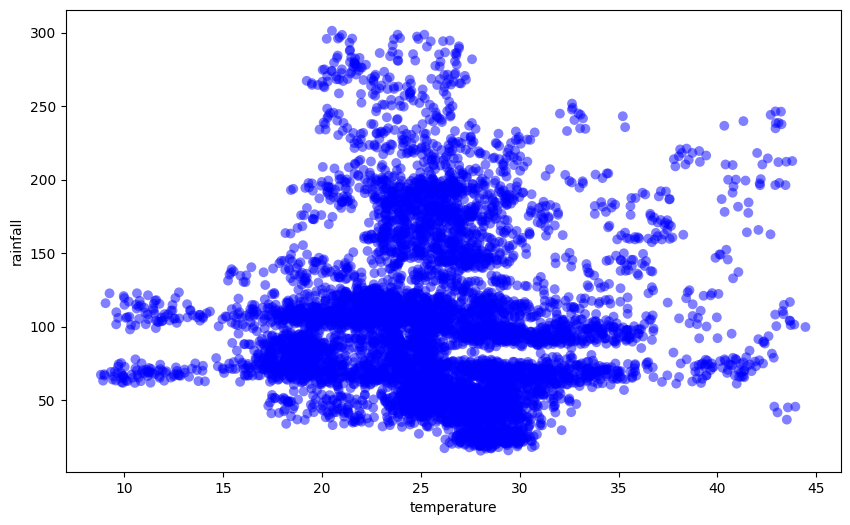

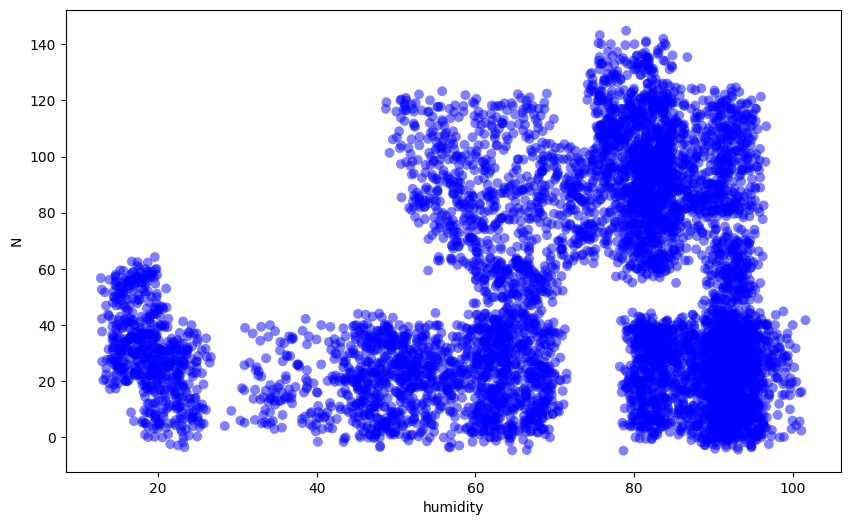

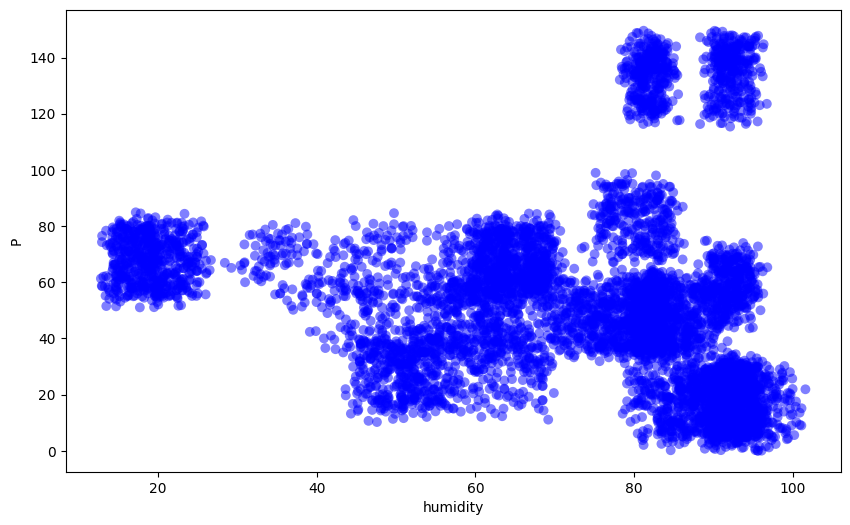

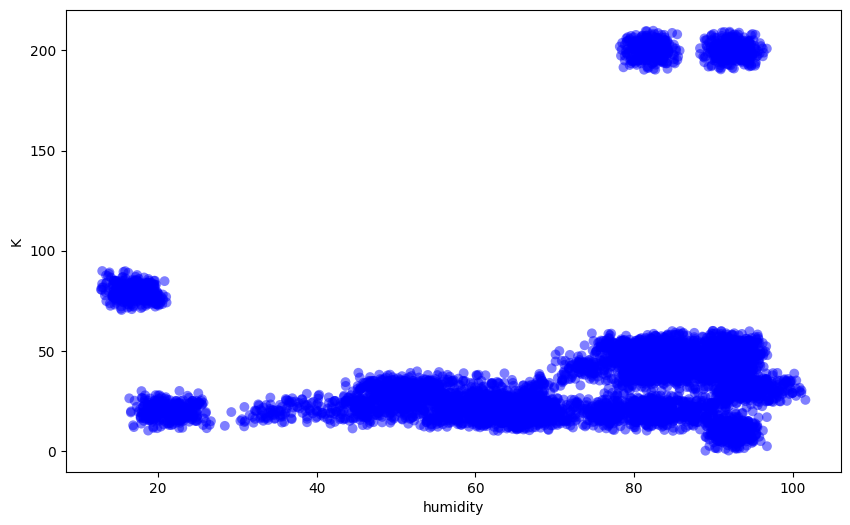

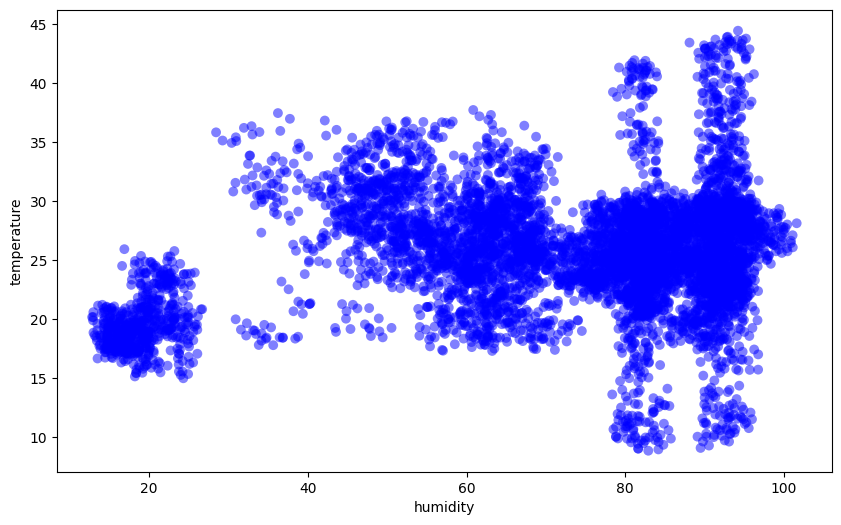

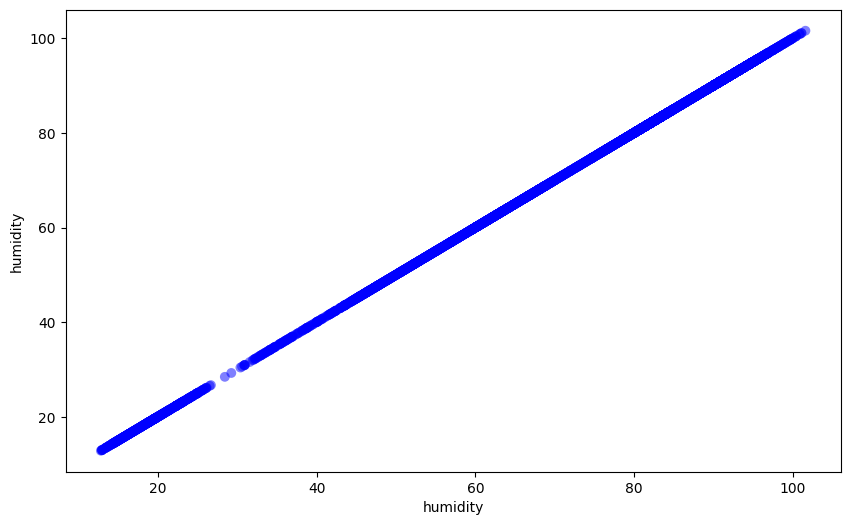

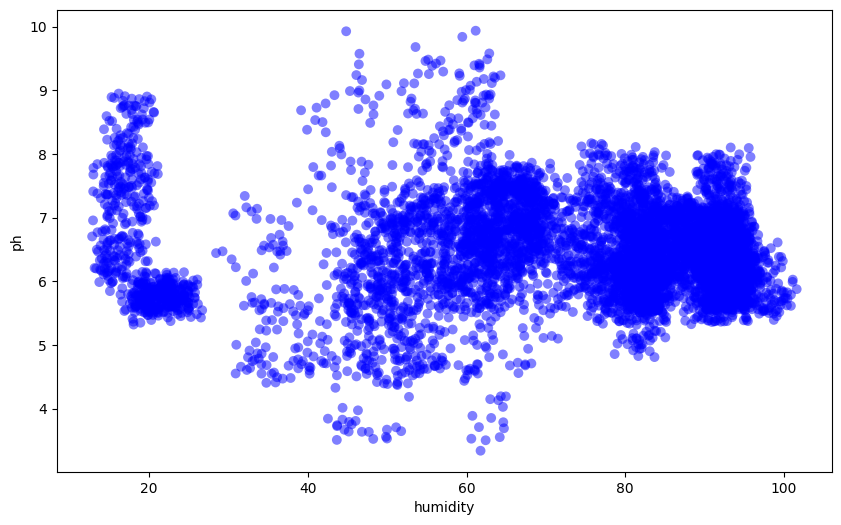

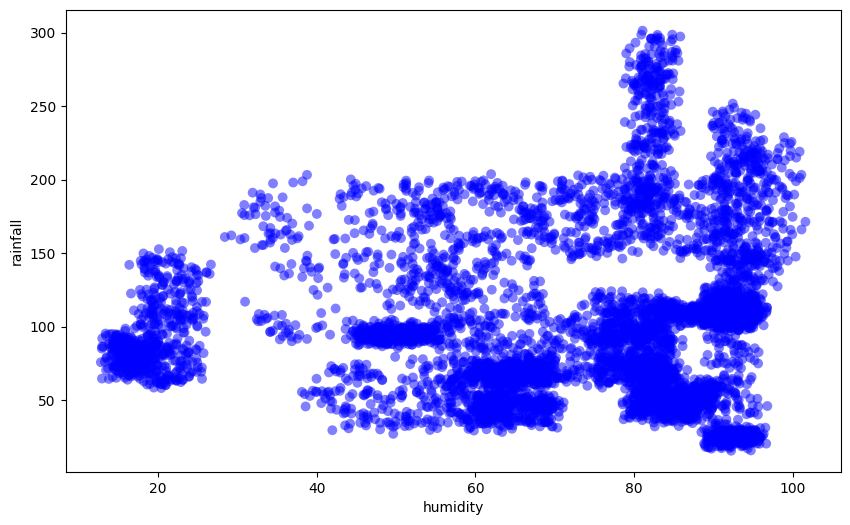

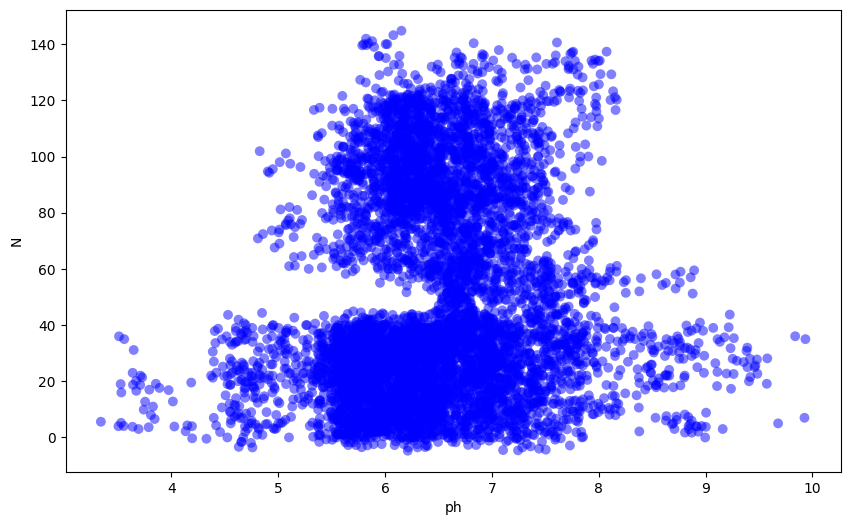

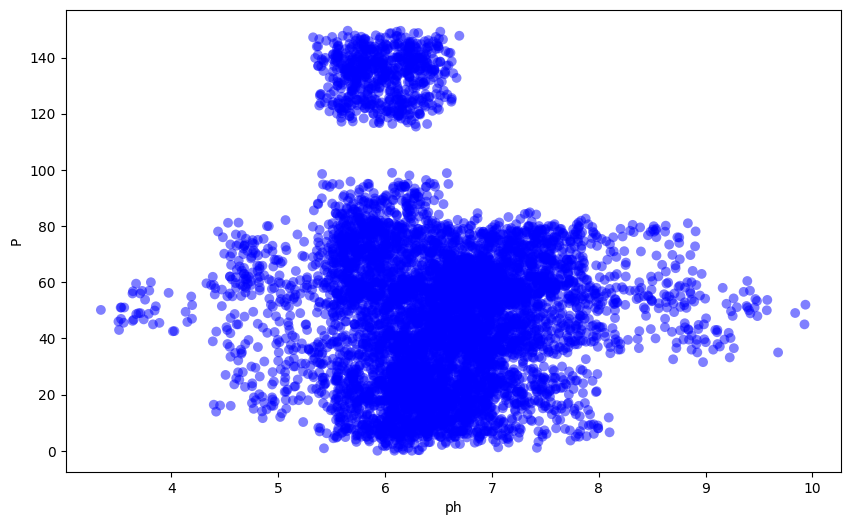

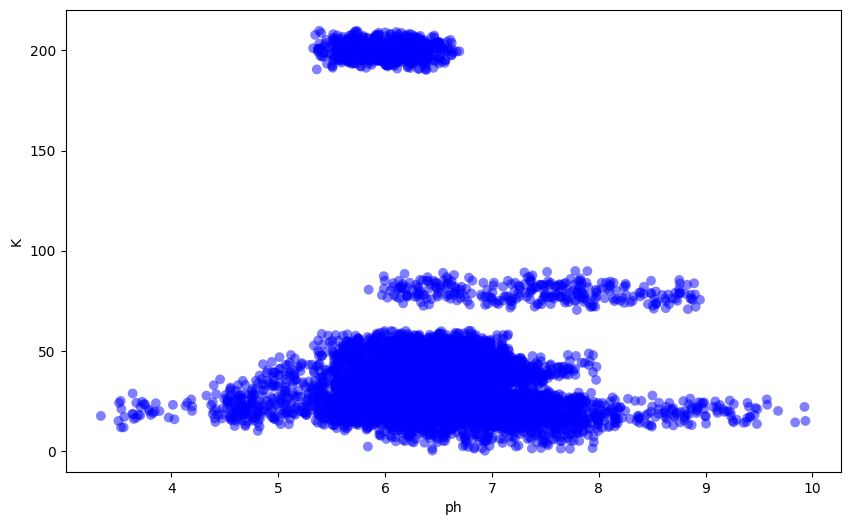

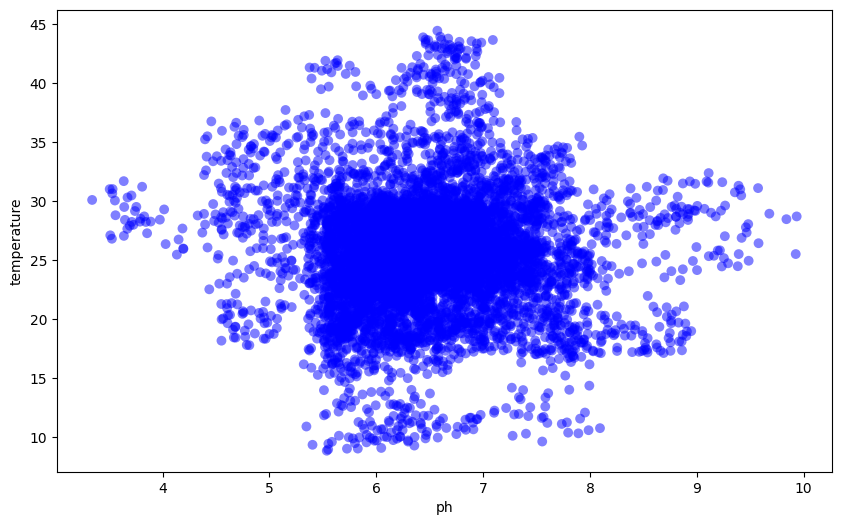

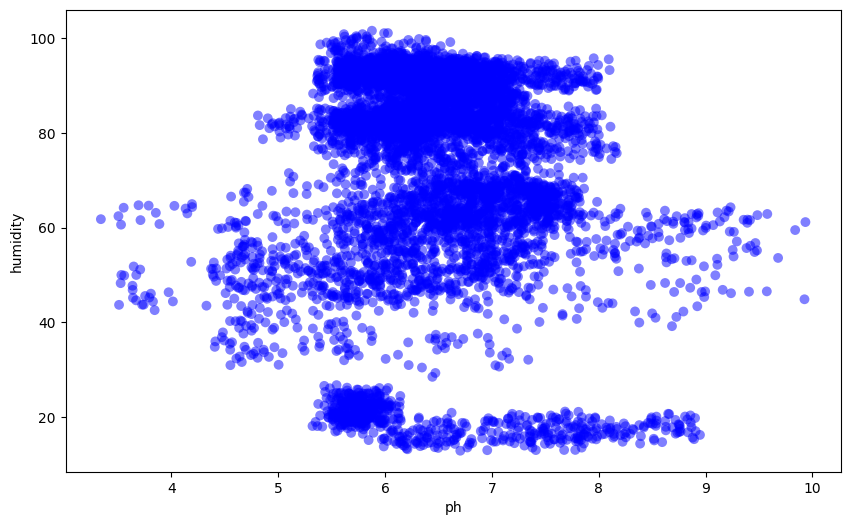

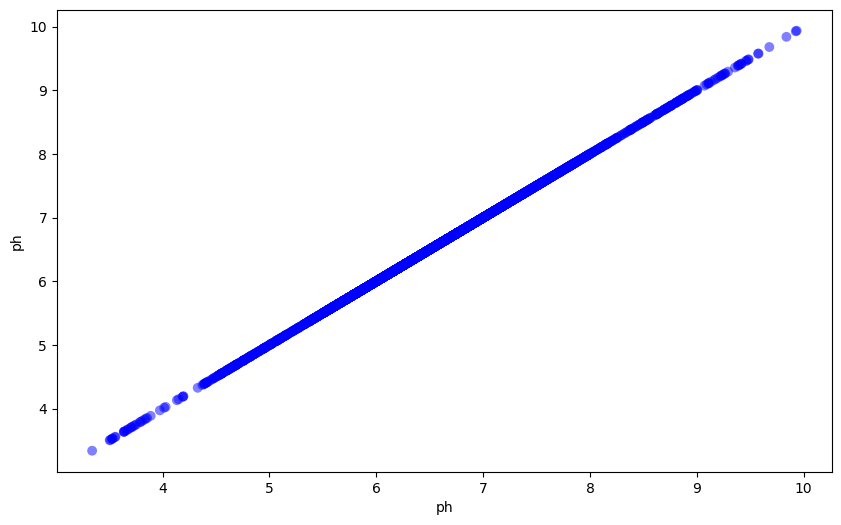

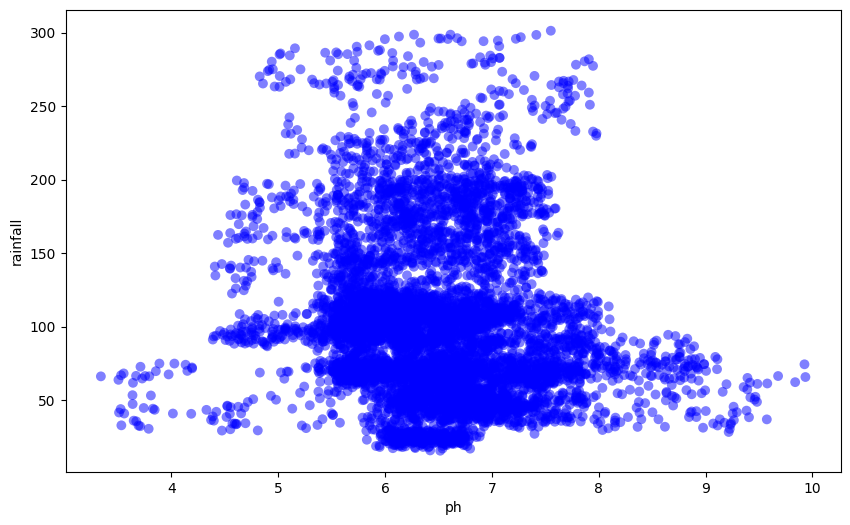

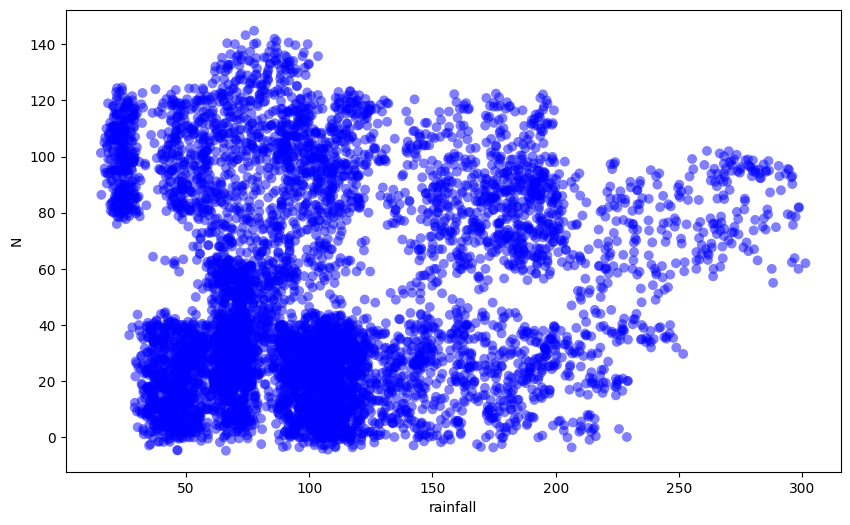

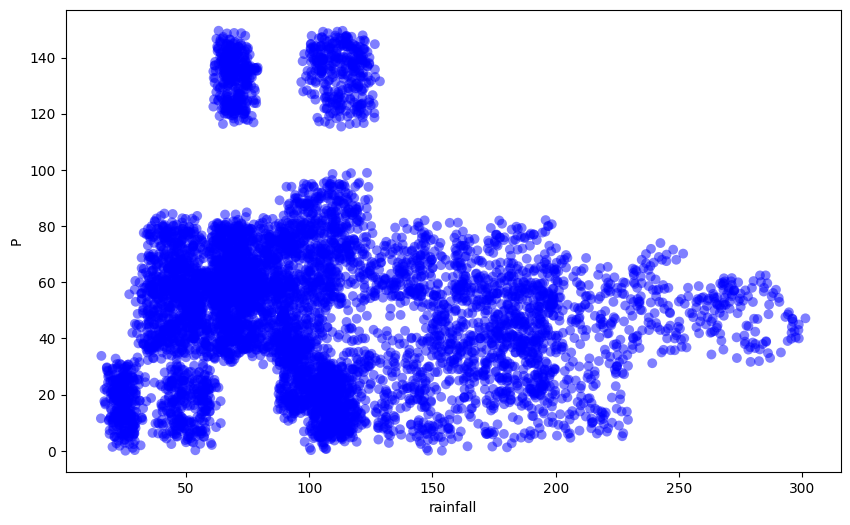

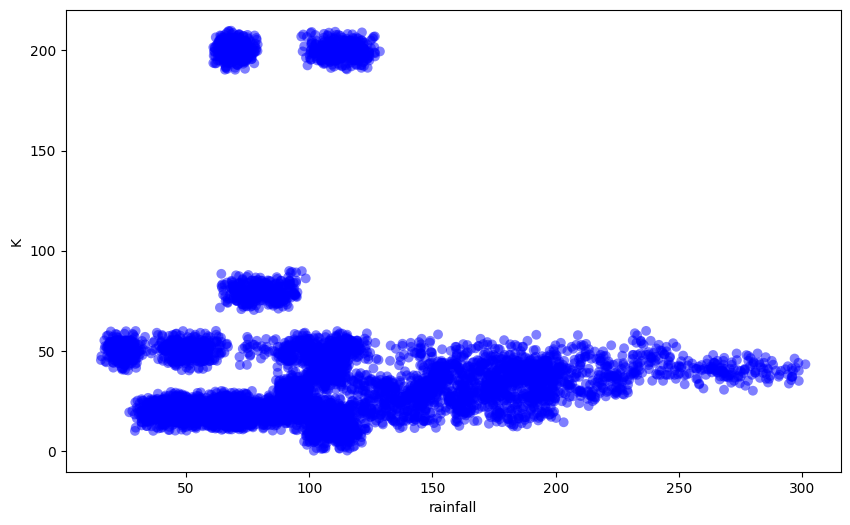

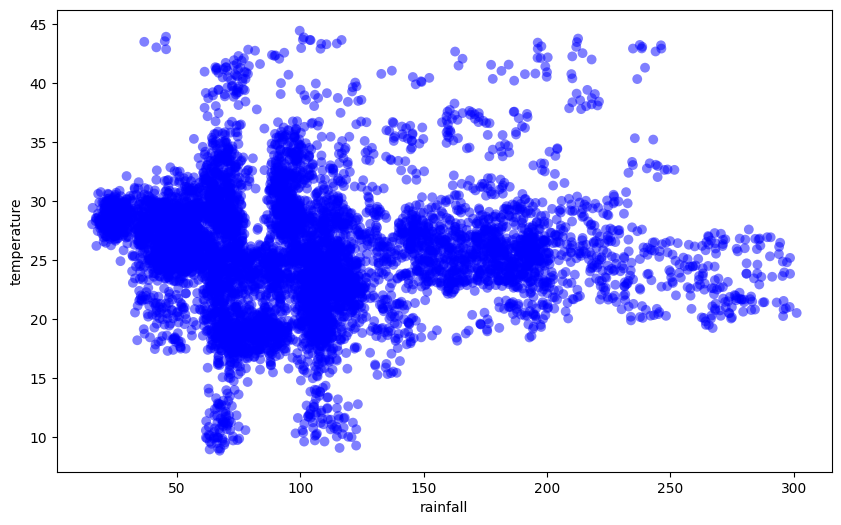

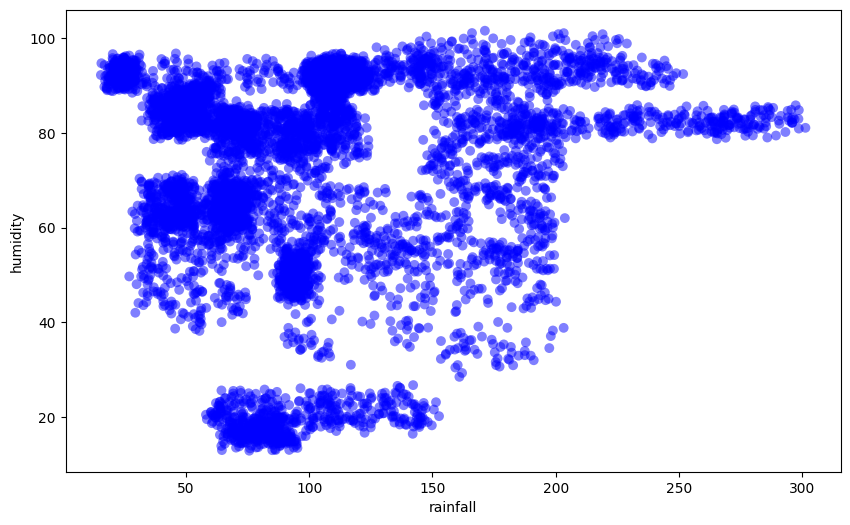

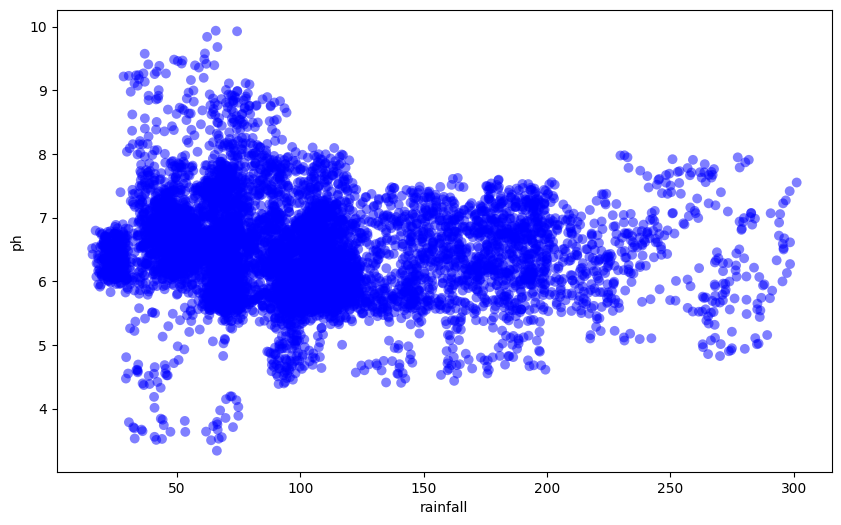

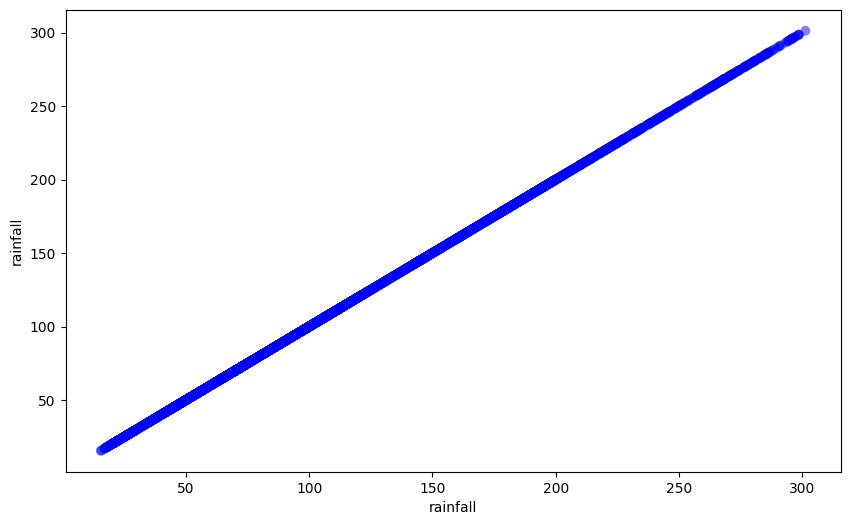

In [7]:
# Plotting Scatterplots of each continuous feature against TARGET_FEATURE
for feature1 in continuous_features:
    for feature2 in continuous_features:
            data=df.copy()
            plt.figure(figsize=(10,6))  # specify figure size
            plt.scatter(df[feature1], df[feature2], s=50, 
                        marker='o',  # use circle markers
                        c='b',       # set marker color to blue
                        alpha=0.5,   # set transparency level
                        edgecolors='none')  # remove marker borders
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.show()

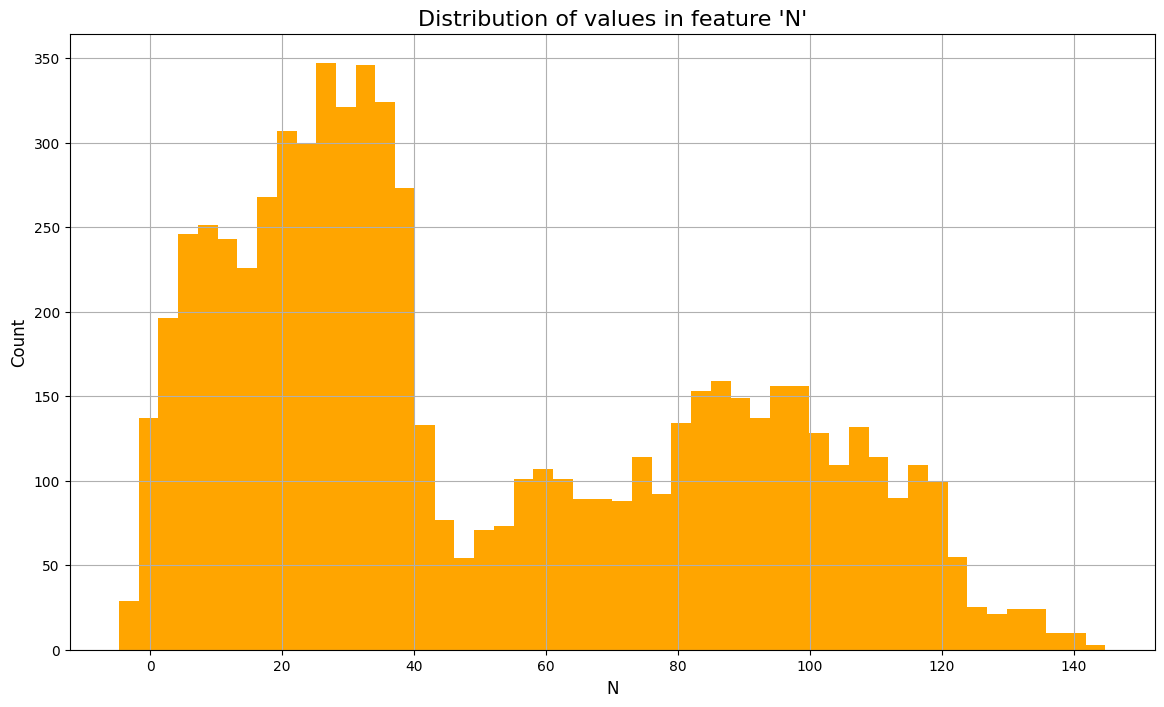

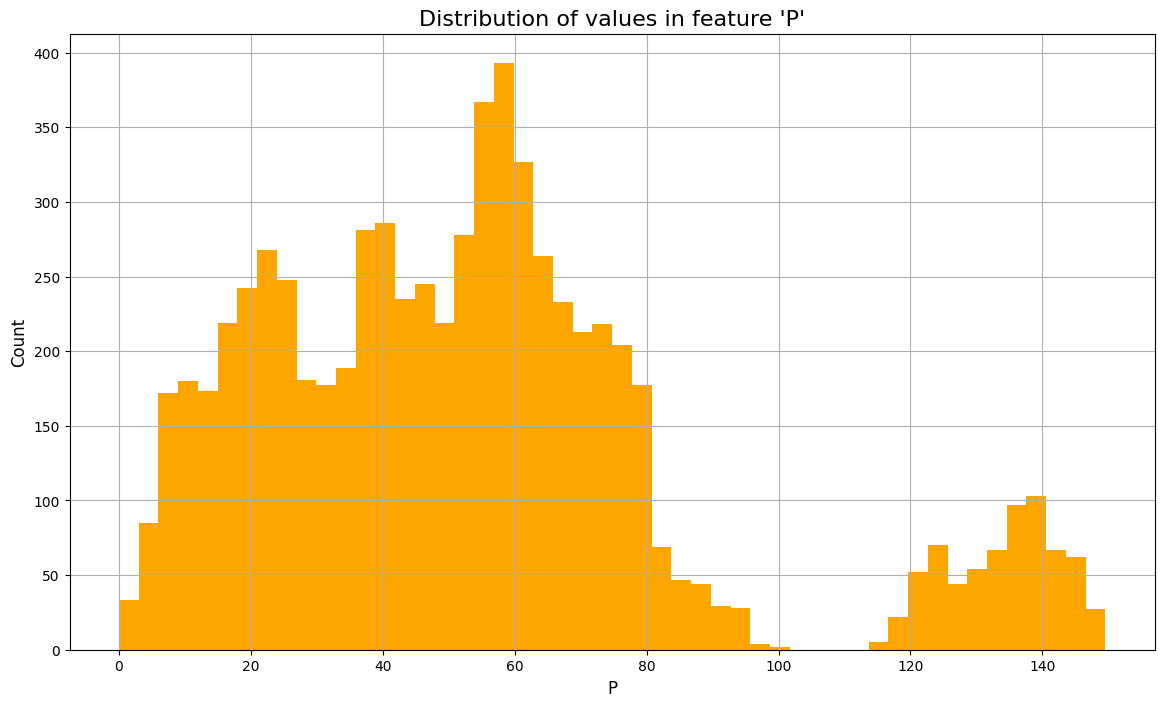

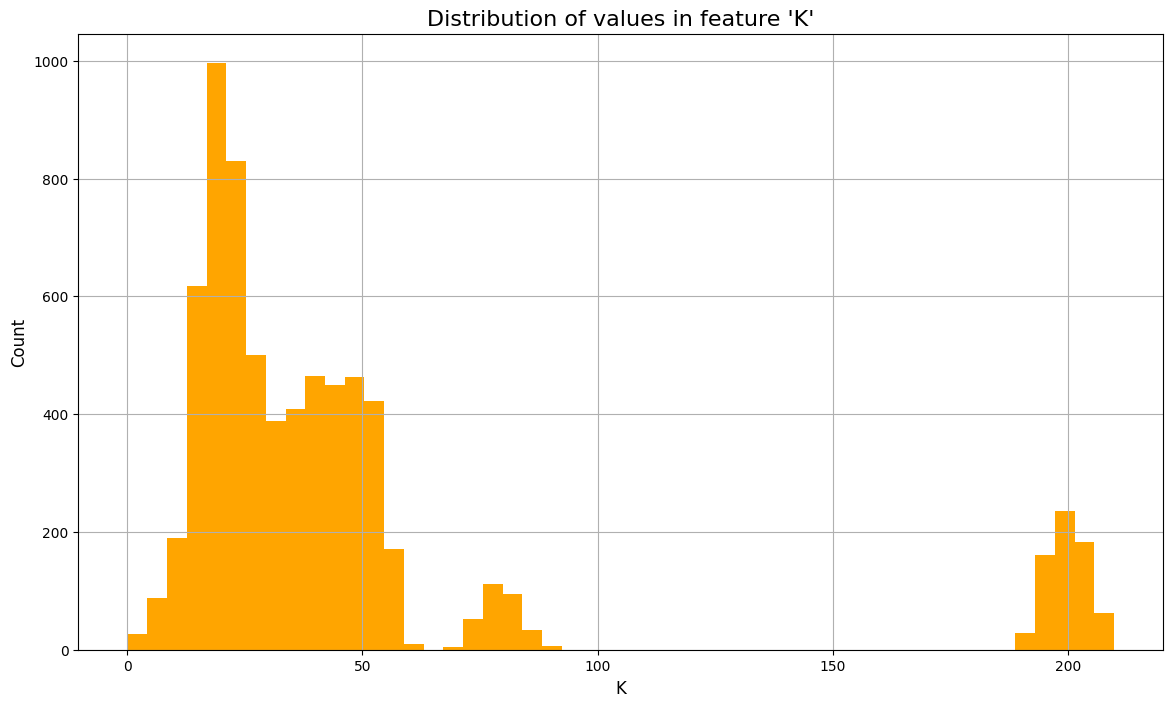

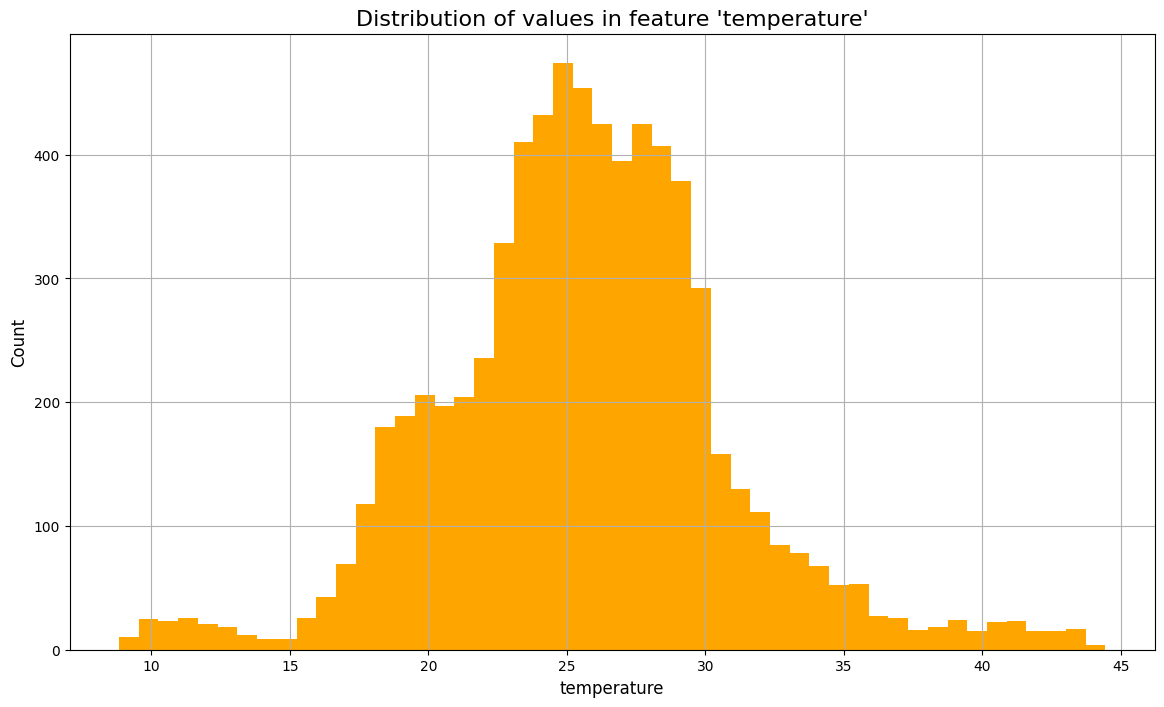

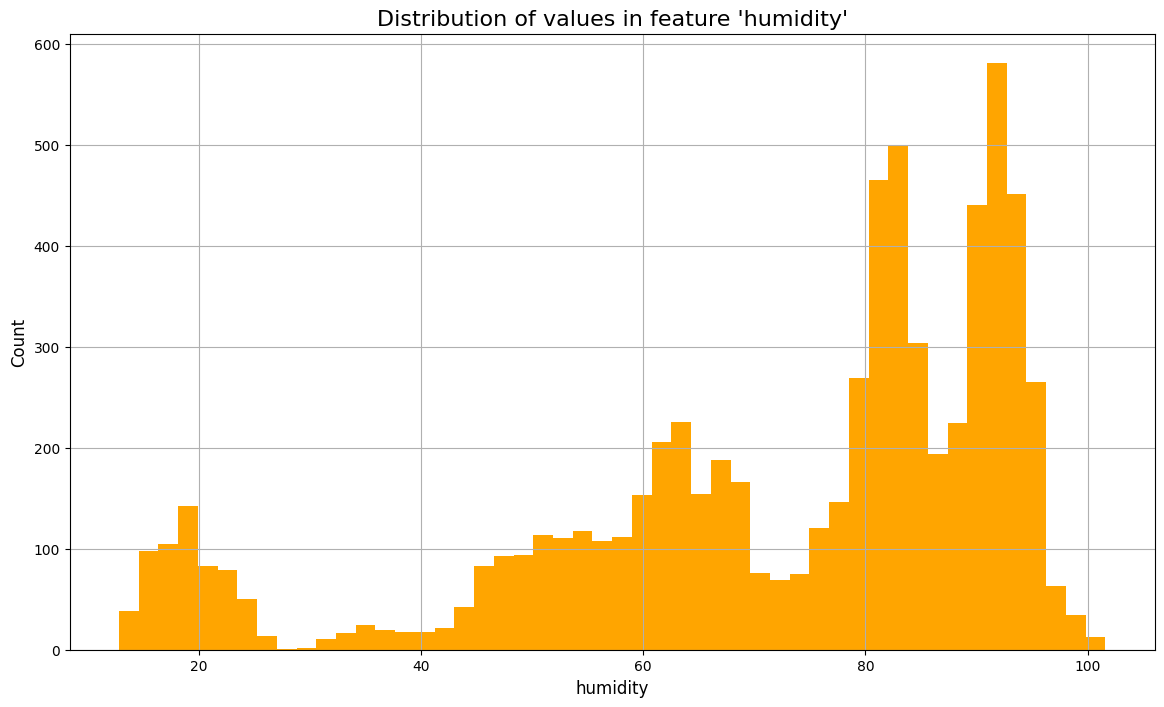

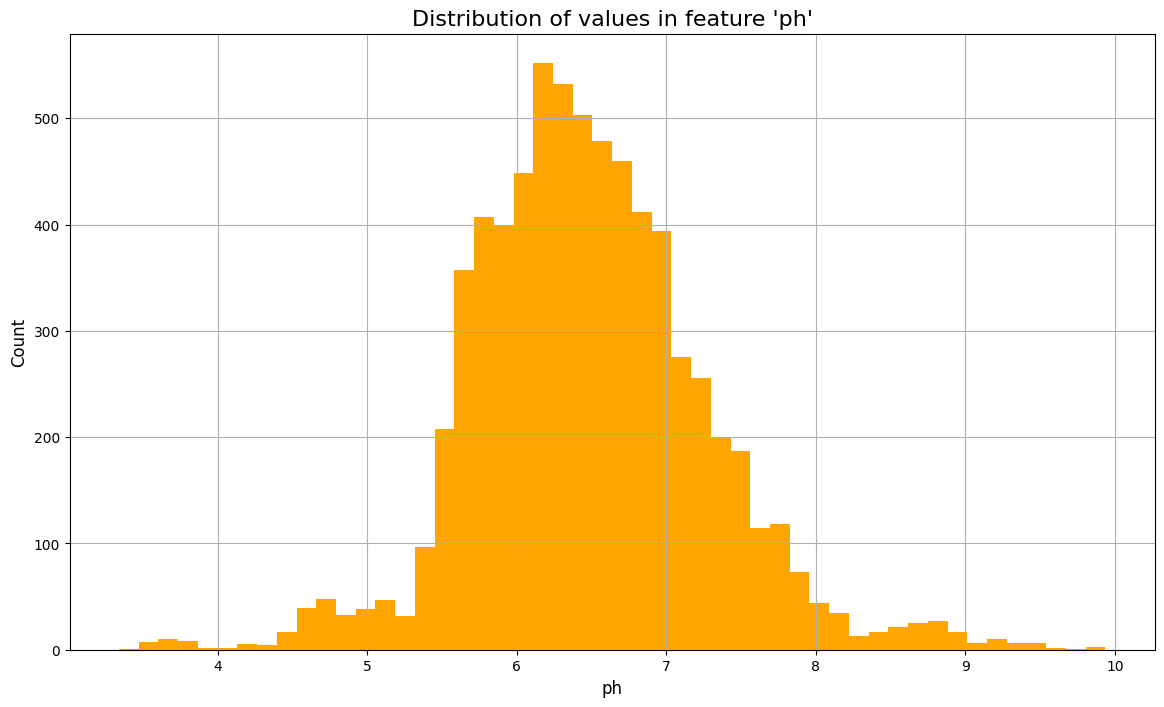

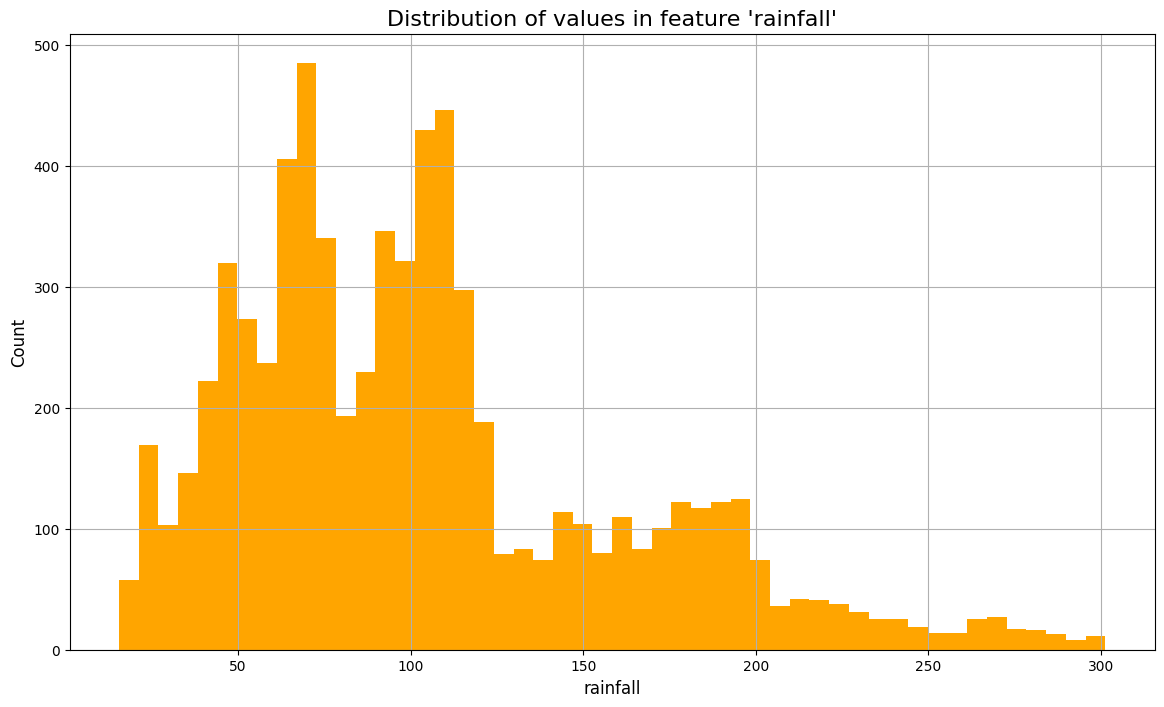

In [8]:
# Find the Distribution of values in each Continuous feature (create histograms)
for feature in continuous_features:
  # Set the figure size
  plt.subplots(figsize=(14, 8))

  # Increase the number of bins
  data[feature].hist(bins=50, color='orange')

  # Add a title
  plt.title("Distribution of values in feature '" + feature + "'", fontsize=16)

  # Adjust the axes labels
  plt.xlabel(feature, fontsize=12)
  plt.ylabel("Count", fontsize=12)

  plt.show()

## **Model Training**

In [9]:
x = df.drop("label", axis=1)
y = df["label"]

print(x.shape)
x.sample(10)

(7000, 7)


N           P           K  temperature   humidity        ph  \
6212  117.850922   20.201721   57.052439    29.329996  91.695576  6.453675   
5331   19.104943   51.429469   23.814569    27.272323  63.102609  3.854915   
3715   90.200119   46.963424   37.154988    20.815262  82.216928  6.522017   
143    89.000000   60.000000   17.000000    25.375488  57.210256  5.983953   
2136   84.000000   27.000000   29.000000    23.322932  53.003663  7.167093   
6569    6.877231   59.298545   28.067615    21.344382  40.332509  4.645458   
6634   43.323944   68.924504   46.381506    38.971458  91.623293  6.878102   
5273   43.259165   57.366343   88.449205    17.825024  13.834278  6.183120   
3403   28.318067  144.809743  198.844919    23.508454  93.233041  6.117011   
3927   98.075178   51.289565   13.837398    23.986906  84.817412  7.825487   

        rainfall  
6212   20.391766  
5331   69.649614  
3715  295.925406  
143   101.700431  
2136  168.264429  
6569  140.177167  
6634  101.626120  
5273   64.383223  
3403  100.741785  
3927   64.290553

In [10]:
print(y.shape)
y.sample(10)

(7000,)


5493     watermelon
5290    pomegranate
1803        coconut
5654    pomegranate
6451        coconut
4408           rice
1628         orange
4433     watermelon
5479          maize
1216         grapes
Name: label, dtype: object

In [11]:
# DATA SPLITTING 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

## **LightGBM Classifier Model**

In [12]:
# Creating a lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()

# Training the model using Training Data
model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 7
[LightGBM] [Info] Start training from score -3.113069
[LightGBM] [Info] Start training from score -3.125190
[LightGBM] [Info] Start training from score -3.121134
[LightGBM] [Info] Start training from score -3.085344
[LightGBM] [Info] Start training from score -2.985075
[LightGBM] [Info] Start training from score -3.154058
[LightGBM] [Info] Start training from score -3.050792
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -3.024720
[LightGBM] [Info] Start training from score -3.158251
[LightGBM] [Info] Start training from score -3.081446
[LightGBM] [Info] Start training from score -3.066001
[LightGBM] [Info] Start training from score -3.121134
[LightGBM] 

LGBMClassifier()

In [13]:
output = model.predict([[101,10,47,25.5421695,83.31883376,6.936997681,57.57343233]])
print("Predicted Crop : ",output[0])

Predicted Crop :  watermelon


In [14]:
# Save the trained model to a file
model.booster_.save_model('new_lgbm_model.txt')

### **CONCLUSION : The objective of this notebook have been achieved. We trained and saved our model which we can now use in production environment.**